In [2]:
%pylab inline --no-import-all
import numpy as np
import seaborn as sns; sns.set()
from scipy.ndimage.measurements import label

def iswin(board):
    board, _ = label(board)
    bottom = board[0][board[0] > 0]
    top = board[-1][board[-1] > 0]
    return np.in1d(bottom, top).any()

def run(p, n):
    board = np.random.random((n, n)) < p
    return iswin(board)

def prob(p, n, nreal=10000):
    return np.mean([run(p, n) for _ in range(nreal)])

Populating the interactive namespace from numpy and matplotlib


In [118]:
prob(0.5, 1000, 10000)

0.0

In [100]:
x = np.arange(1, 11)
fair = np.array([prob(0.5, i) for i in x])
bias = np.array([prob(0.7, i) for i in x])

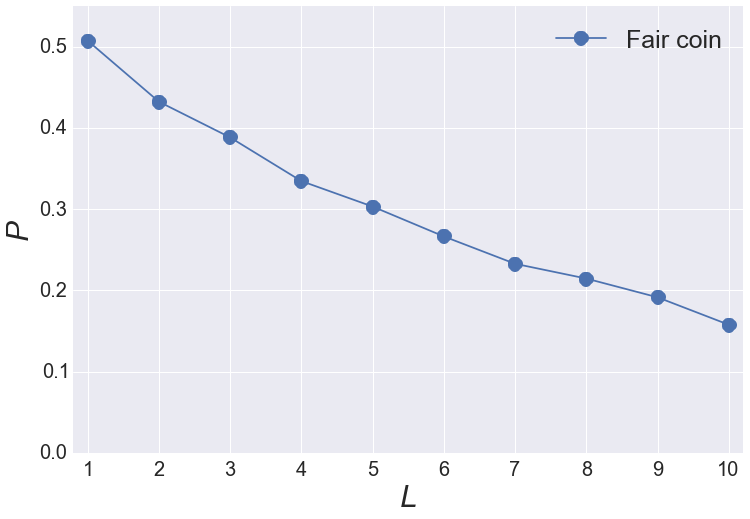

In [104]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, fair, 'o-', ms=15, label='Fair coin')
ax.set_xlim(0.8, 10.2)
ax.set_ylim(0.0)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("L", fontsize=30, style='italic')
ax.set_ylabel("P", fontsize=30, style='italic')
ax.legend(loc='best', fontsize=25)

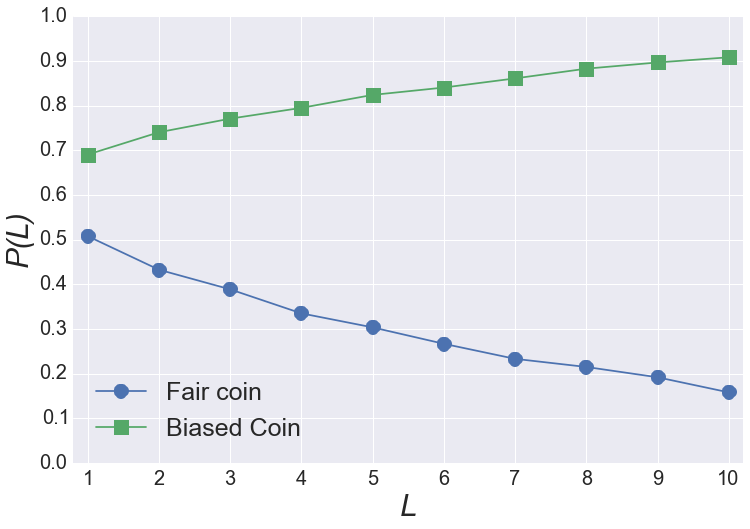

In [109]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, fair, 'o-', ms=15, label='Fair coin')
ax.plot(x, bias, 's-', ms=15, label='Biased Coin')
ax.set_xlim(0.8, 10.2)
ax.set_ylim(0.0)
ax.set_xticks(x)
ax.set_yticks(np.linspace(0.0,1.0,11))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("L", fontsize=30, style='italic')
ax.set_ylabel("P(L)", fontsize=30, style='italic')
ax.legend(loc='best', fontsize=25)

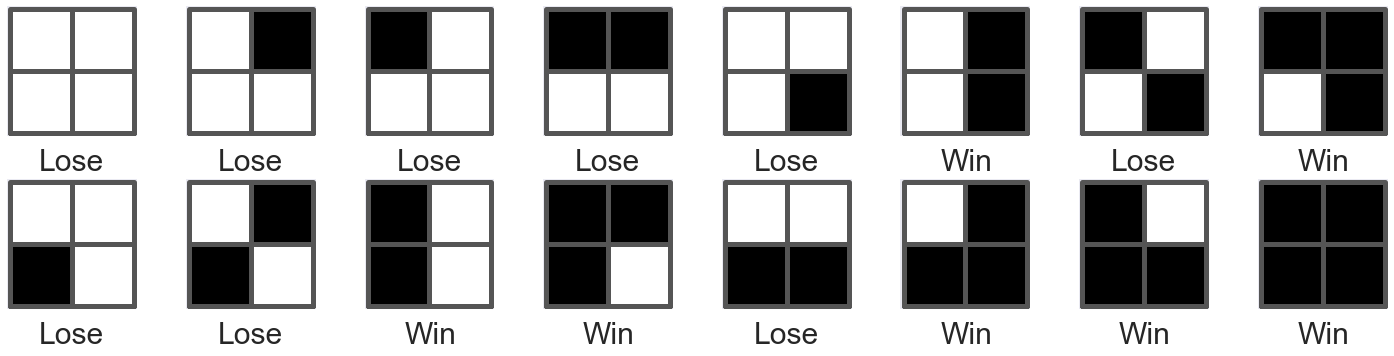

In [12]:
from itertools import product
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(10*2,10/2))
axes = axes.ravel()
grid = np.array([[0,0],[0,2],[2,2],[2,0],[0,0],
                 [0,1],[2,1],[2,0],[1,0],[1,2]]).T
for i, ax in zip(product([0, 1], repeat=4), axes):
    i = np.array(i).reshape(2,2)
    ax.plot(*grid, lw=5, c='#555555')
    ax.pcolormesh(i, vmin=0, vmax=1)
    ax.set_xlim(-0.05,2.05)
    ax.set_ylim(ax.get_xlim())
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('Win' if iswin(i) else 'Lose', fontsize=30)
    ax.set_aspect('equal')
fig.tight_layout()